# Data Wrangling and Analyzing - Udacity Data Analysis Nanodegree

###### by Hager Mohamed

## Table of Content

- Problem Definition
- Dataset
- Data Gathering
- Data Assessment
    - visual assessment 
    - programatic assessment 
    - Quality issues
    - Tidiness issues
- Data cleanup
- visualization

### Problem Definition
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


### Dataset
#### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

#### Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

<b>So for the last row in that table:</b>

- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
etc.

#### Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API or download the json file uploaded in the nanodegree resources. 

********************

### Data Gathering
1. Download archived file manually
2. Download image prediction file by code through request package
3. Download the twitter data programatically either through twitter API or through request from Udacity server 

In [829]:
import pandas as pd
import numpy as np
import requests as req
import os
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [830]:
'''
function downlowd file from given url

Input (str) represents url

Returns Downloaded file name
'''

def request_file(url):
    response = req.get(url)
    file_name = url.split('/')[-1]
    # save content of response in the file
    if not os.path.isfile(file_name):
        with open(file_name,'wb') as f:
            f.write(response.content)
    return file_name

In [831]:
# read archived tweets

archive_df = pd.read_csv("twitter-archive-enhanced.csv")

In [832]:
#download image prediction file

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = request_file(url)

In [833]:
#read image prediction file

prediction_df = pd.read_csv(file_name,sep='\t')

In [834]:
json_url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
file_name = request_file(json_url)

In [835]:
# import tweepy
# from tweepy import OAuthHandler
# from timeit import default_timer as timer

#  Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#  These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

#  NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#  df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#  change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#  NOTE TO REVIEWER: this student had mobile verification issues so the following
#  Twitter API code was sent to this student from a Udacity instructor
#  Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

#  Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
#  Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [836]:
#create dataframe from json objects
json_list=[]

with open(file_name) as json_file:
    for obj in json_file:
        tweet = json.loads(obj)
        tweet_id = tweet['id']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        followers_count = tweet['user']['followers_count']
        json_list.append({'tweet_id':tweet_id, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'followers_count':followers_count})

json_df = pd.DataFrame(json_list, columns= json_list[0].keys())

### Visual Assessment 
list the 3 dataframes for visual assessment 

In [837]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [838]:
prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [839]:
# save json dataframe into csv format for visual assessment 
json_df.to_csv('twitter.csv',index=False)
json_df

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,39467,8853,3200889
1,892177421306343426,33819,6514,3200889
2,891815181378084864,25461,4328,3200889
3,891689557279858688,42908,8964,3200889
4,891327558926688256,41048,9774,3200889
...,...,...,...,...
2349,666049248165822465,111,41,3201018
2350,666044226329800704,311,147,3201018
2351,666033412701032449,128,47,3201018
2352,666029285002620928,132,48,3201018


### Programmatic Assessment 
using pandas functions to assess the data

In [840]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [841]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
591,799063482566066176,NaN,NaN,2016-11-17 01:35:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He only wears the most fashion...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799063482...,11,10,Mister,None,None,None,None
1211,715360349751484417,NaN,NaN,2016-03-31 02:09:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bertson. He just wants to say hi. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715360349...,11,10,Bertson,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
1875,675113801096802304,NaN,NaN,2015-12-11 00:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zuzu. He just graduated college. Astute p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675113801...,10,10,Zuzu,None,None,pupper,None
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None


In [842]:
archive_df.tweet_id.isnull().any()

False

In [843]:
archive_df.tweet_id.duplicated().sum()

0

In [844]:
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Pippin       1
Kawhi        1
Tess         1
Yukon        1
Claude       1
Name: name, Length: 957, dtype: int64

In [845]:
# check rates validity
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [846]:
archive_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [847]:
archive_df.query('rating_numerator == 204')['text']

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object

In [848]:
archive_df.query('rating_numerator ==204')['text'][1120]

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [849]:
#check denominatior consistency
archive_df.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [850]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [851]:
prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1308,753655901052166144,https://pbs.twimg.com/media/CnWGCpdWgAAWZTI.jpg,1,miniature_pinscher,0.456092,True,toy_terrier,0.153126,True,Italian_greyhound,0.144147,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True
911,700796979434098688,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,1,tailed_frog,0.652712,False,tree_frog,0.280212,False,bullfrog,0.040177,False


In [852]:
prediction_df[prediction_df.jpg_url.duplicated() & prediction_df.img_num.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [853]:
# rows that's not classified as dogs should be removed
prediction_df.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [854]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favorite_count   2354 non-null   int64
 2   retweet_count    2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [855]:
json_df.describe()

,tweet_id,favorite_count,retweet_count,followers_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,8080.968564,3164.797366,3.200942e+06
std,6.852812e+16,11814.771334,5284.770364,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,1415.000000,624.500000,3.200898e+06
50%,7.194596e+17,3603.500000,1473.500000,3.200945e+06
75%,7.993058e+17,10122.250000,3652.000000,3.200953e+06
max,8.924206e+17,132810.000000,79515.000000,3.201018e+06


In [856]:
json_df[json_df.tweet_id.duplicated()]

,tweet_id,favorite_count,retweet_count,followers_count


#### Quality Issues
###### archive_df

1. Drop rows indicates to be retweet or reply
2. Drop data that doesn't have images in image prediction
3. useless coloumns need to be dropped
4. numerators and dominators datatypes need to be decimal
5. values of numerators and dominators need to be fixed as mentioned in text cause it impacts quality of rates
6. timestamp datatype should be converted into datetime object
7. dog names in name coloumn have many typos 
8. some rows have None value which makes it meaningliess and should be dropped
9. calculate rate from numerators and denominators
10. Replace none value with NAN value
###### prediction_df
11. some image urls and num are duplicated which means repeatition in data
12. some p#_dog are false as it's not even a dog

###### json_df
12. drop unused keys from json objects

#### tidiness_issues
1. archived_df 4 columns (dogger, floofer, pupper and puppo) for one variable (dog type)
2. predictions: the dog breed prediction could be packed into one column (breed_pred)
3. predictions: the prediction confidence could be packed into one column (pred_confidence)
4. spread timestamp into 3 columns day, month and year
5. merge all into one cleaned dataframe


## Cleaning Data


1. drop rows that indecates to be retweet or reply

In [857]:
# databackup

archive_bkup = archive_df.copy()
prediction_bkup = prediction_df.copy()
tweetapi_bkup = json_df.copy()

In [858]:
archive_df = archive_df[archive_df.in_reply_to_status_id.isnull()]
archive_df = archive_df[archive_df.retweeted_status_id.isnull()]
archive_df.info()
archive_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. fix datatype of timestamp coloumn to be datetime instead of string


In [859]:
archive_df['timestamp'] = pd.to_datetime(archive_df['timestamp'])

3. split timestamp to 3 column

In [860]:
archive_df['year'] = archive_df.timestamp.dt.year
archive_df['month'] = archive_df.timestamp.dt.month
archive_df['day'] = archive_df.timestamp.dt.day

archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

4. fix datatype of numerator and denominator to be decimal for accurate rating

In [861]:
archive_df['rating_numerator'] = archive_df['rating_numerator'].astype(float)
archive_df['rating_denominator'] = archive_df['rating_denominator'].astype(float)

archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64         

In [862]:
archive_df['rate'] = (archive_df.rating_numerator / archive_df.rating_denominator)
archive_df.rate.value_counts()

1.200000      490
1.000000      438
1.100000      418
1.300000      287
0.900000      153
0.800000       98
0.700000       51
1.400000       38
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
0.000000        1
0.818182        1
Name: rate, dtype: int64

In [863]:
archive_df.query('rate == 2.7')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rate
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,...,10.0,Sophie,None,None,pupper,None,2016,9,20,2.7


In [864]:
archive_df.query('rate == 2.7')['text'][763]

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [865]:
archive_df.loc[(archive_df.tweet_id == 778027034220126208), 'rate'] = 1.127
archive_df.rate.value_counts()

1.200000      490
1.000000      438
1.100000      418
1.300000      287
0.900000      153
0.800000       98
0.700000       51
1.400000       38
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.818182        1
3.428571        1
1.127000        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
0.000000        1
Name: rate, dtype: int64

In [866]:
archive_df.query('rate == 42')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rate
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,...,10.0,None,None,None,None,None,2015,11,29,42.0


In [867]:
archive_df.query('rate ==42')['text'][2074]


'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [868]:
try:
    archive_df.drop(index=2074,inplace=True)
except:
    pass
archive_df.query('rate == 42')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rate


In [869]:
archive_df.query('rate ==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rate
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,...,10.0,None,None,None,None,None,2017,2,24,0.0


In [870]:
archive_df.query('rate ==0')['text'][315]

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [871]:
try:
    archive_df.drop(index=315,inplace=True)
except:
    pass
archive_df.query('rate == 0')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rate


In [872]:
archive_df.query('rate ==7.5')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rate
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,...,10.0,Logan,None,None,None,None,2016,10,13,7.5


In [873]:
archive_df.query('rate ==7.5')['text'][695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [874]:
archive_df.loc[(archive_df.tweet_id == 786709082849828864), 'rate'] = 0.975


In [875]:
archive_df.query('rate == 2.6')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rate
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,...,10.0,None,None,None,None,None,2015,12,25,2.6


In [876]:
archive_df.loc[(archive_df.tweet_id == 680494726643068929), 'rate'] = 1.126

In [877]:
archive_df.query('rate == 177.600000')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rate
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,...,10.0,Atticus,None,None,None,None,2016,7,4,177.6


In [878]:
try:
    archive_df.drop(979,inplace=True)
except:
    pass
archive_df.query('rate == 177.600000')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rate


In [879]:
try:
    archive_df.drop(45,inplace=True)
except:
    pass
archive_df.query('tweet_id == 883482846933004288')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rate


In [880]:
archive_df.replace(to_replace='None', value='', inplace=True)
archive_df['dogs_type'] = archive_df['doggo'] + archive_df['pupper'] + archive_df['puppo'] + archive_df['floofer']

archive_df.query('tweet_id == 854010172552949760')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,year,month,day,rate,dogs_type
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,,doggo,floofer,,,2017,4,17,1.1,doggofloofer


In [881]:
try:
    archive_df.drop(['in_reply_to_status_id',
               'in_reply_to_user_id',
               'timestamp',
               'source',
               'retweeted_status_id',
               'retweeted_status_user_id',
               'retweeted_status_timestamp',
               'expanded_urls',
               'rating_numerator',
               'rating_denominator',
                    'doggo',
                    'floofer',
                    'pupper',
                    'puppo'],
               axis=1,inplace=True)
except:
    pass
archive_df

,tweet_id,text,name,year,month,day,rate,dogs_type
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,2017,8,1,1.3,
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,2017,8,1,1.3,
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,2017,7,31,1.2,
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,2017,7,30,1.3,
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,2017,7,29,1.2,
...,...,...,...,...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,,2015,11,16,0.5,
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,a,2015,11,16,0.6,
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,a,2015,11,15,0.9,
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,a,2015,11,15,0.7,


In [882]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [883]:
duplicated_index = prediction_df[prediction_df.jpg_url.duplicated() & prediction_df.img_num.duplicated()].index
prediction_df.drop(duplicated_index,inplace=True)

In [884]:
false_dogs = prediction_df.query('p1_dog == False & p2_dog == False & p3_dog == False').index
prediction_df.drop(false_dogs,inplace=True)

In [885]:
archive_df = pd.merge(archive_df,prediction_df,how='inner', on="tweet_id")
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1664 non-null   int64  
 1   text       1664 non-null   object 
 2   name       1664 non-null   object 
 3   year       1664 non-null   int64  
 4   month      1664 non-null   int64  
 5   day        1664 non-null   int64  
 6   rate       1664 non-null   float64
 7   dogs_type  1664 non-null   object 
 8   jpg_url    1664 non-null   object 
 9   img_num    1664 non-null   int64  
 10  p1         1664 non-null   object 
 11  p1_conf    1664 non-null   float64
 12  p1_dog     1664 non-null   bool   
 13  p2         1664 non-null   object 
 14  p2_conf    1664 non-null   float64
 15  p2_dog     1664 non-null   bool   
 16  p3         1664 non-null   object 
 17  p3_conf    1664 non-null   float64
 18  p3_dog     1664 non-null   bool   
dtypes: bool(3), float64(4), int64(5), object(7)
memo

In [886]:
archive_df['p_dog_max'] = archive_df['p1_dog']
archive_df['p_max'] = archive_df['p1']
for i, row in archive_df.iterrows():
    archive_df['p_conf_max'] = archive_df[['p1_conf', 'p2_conf','p3_conf']].max(axis=1)
    if row['p1_conf'] == archive_df['p_conf_max'][i]:
        archive_df['p_dog_max'][i] = row['p1_dog']
        archive_df['p_max'][i] = row['p1']
    elif row['p2_conf'] == archive_df['p_conf_max'][i]:
        archive_df['p_dog_max'][i] = row['p2_dog']
        archive_df['p_max'][i] = row['p2']
    elif row['p3_conf'] == archive_df['p_conf_max'][i]:
        archive_df['p_dog_max'][i] = row['p3_dog']
        archive_df['p_max'][i] = row['p3']
    else:
        archive_df['p_dog_max'][i] = np.nan
        archive_df['p_max'][i] = np.nan
archive_df.info()

<ipython-input-886-f245c71d5a62>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_df['p_dog_max'][i] = row['p1_dog']
<ipython-input-886-f245c71d5a62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_df['p_max'][i] = row['p1']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1664 non-null   int64  
 1   text        1664 non-null   object 
 2   name        1664 non-null   object 
 3   year        1664 non-null   int64  
 4   month       1664 non-null   int64  
 5   day         1664 non-null   int64  
 6   rate        1664 non-null   float64
 7   dogs_type   1664 non-null   object 
 8   jpg_url     1664 non-null   object 
 9   img_num     1664 non-null   int64  
 10  p1          1664 non-null   object 
 11  p1_conf     1664 non-null   float64
 12  p1_dog      1664 non-null   bool   
 13  p2          1664 non-null   object 
 14  p2_conf     1664 non-null   float64
 15  p2_dog      1664 non-null   bool   
 16  p3          1664 non-null   object 
 17  p3_conf     1664 non-null   float64
 18  p3_dog      1664 non-null   bool   
 19  p_dog_max   1664 non-null  

In [887]:
try:
    archive_df.drop(['p1',
               'p1_conf',
               'p1_dog',
               'p2',
               'p2_conf',
               'p2_dog',
               'p3',
               'p3_conf',
               'p3_dog'
                    ],
               axis=1,inplace=True)
except:
    pass
archive_df

,tweet_id,text,name,year,month,day,rate,dogs_type,jpg_url,img_num,p_dog_max,p_max,p_conf_max
0,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,2017,8,1,1.3,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,True,Chihuahua,0.323581
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,2017,7,31,1.2,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,True,Chihuahua,0.716012
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,2017,7,30,1.3,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,False,paper_towel,0.170278
3,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,2017,7,29,1.2,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,True,basset,0.555712
4,891087950875897856,Here we have a majestic great white breaching ...,,2017,7,29,1.3,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,True,Chesapeake_Bay_retriever,0.425595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,,2015,11,16,0.5,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,True,miniature_pinscher,0.560311
1660,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,a,2015,11,16,0.6,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,True,Rhodesian_ridgeback,0.408143
1661,666033412701032449,Here is a very happy pup. Big fan of well-main...,a,2015,11,15,0.9,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,True,German_shepherd,0.596461
1662,666029285002620928,This is a western brown Mitsubishi terrier. Up...,a,2015,11,15,0.7,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,True,redbone,0.506826


In [888]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favorite_count   2354 non-null   int64
 2   retweet_count    2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [889]:
archive_df = pd.merge(archive_df,json_df,how='inner', on="tweet_id")

In [890]:
archive_df

,tweet_id,text,name,year,month,day,rate,dogs_type,jpg_url,img_num,p_dog_max,p_max,p_conf_max,favorite_count,retweet_count,followers_count
0,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,2017,8,1,1.3,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,True,Chihuahua,0.323581,33819,6514,3200889
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,2017,7,31,1.2,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,True,Chihuahua,0.716012,25461,4328,3200889
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,2017,7,30,1.3,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,False,paper_towel,0.170278,42908,8964,3200889
3,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,2017,7,29,1.2,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,True,basset,0.555712,41048,9774,3200889
4,891087950875897856,Here we have a majestic great white breaching ...,,2017,7,29,1.3,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,True,Chesapeake_Bay_retriever,0.425595,20562,3261,3200889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,,2015,11,16,0.5,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,True,miniature_pinscher,0.560311,111,41,3201018
1660,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,a,2015,11,16,0.6,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,True,Rhodesian_ridgeback,0.408143,311,147,3201018
1661,666033412701032449,Here is a very happy pup. Big fan of well-main...,a,2015,11,15,0.9,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,True,German_shepherd,0.596461,128,47,3201018
1662,666029285002620928,This is a western brown Mitsubishi terrier. Up...,a,2015,11,15,0.7,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,True,redbone,0.506826,132,48,3201018


## Store data

In [891]:
archive_df.to_csv('twitter-cleaned.csv',index=False)


## Visualization

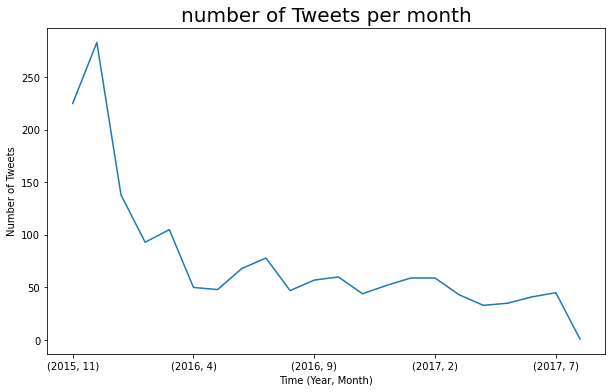

In [892]:
plt.figure(figsize=(10,6))
archive_df['tweet_id'].groupby([archive_df['year'], archive_df['month']]).count().plot(kind='line')
plt.title('number of Tweets per month', size=20)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')

fig = plt.gcf()
fig.savefig('annual_tweets.png',bbox_inches='tight');


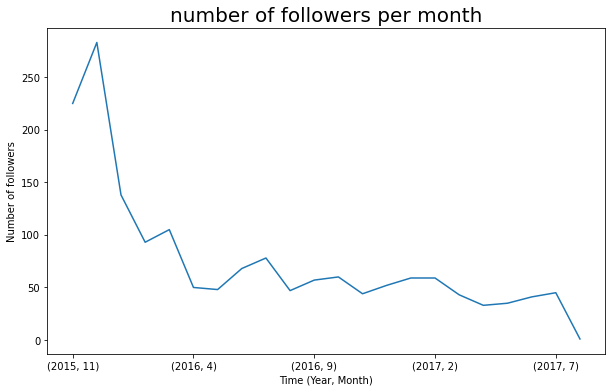

In [893]:
plt.figure(figsize=(10,6))
archive_df['followers_count'].groupby([archive_df['year'],archive_df['month']]).count().plot(kind='line')
plt.title('number of followers per month', size=20)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of followers')

fig = plt.gcf()
fig.savefig('annual_followers.png',bbox_inches='tight');


<Figure size 720x432 with 0 Axes>

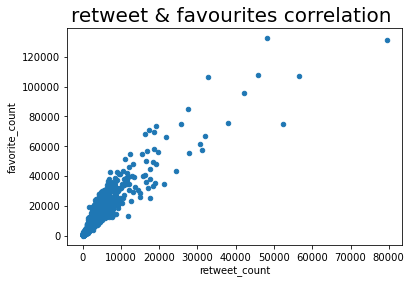

In [894]:
plt.figure(figsize=(10,6))
archive_df.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.title('retweet & favourites correlation ', size=20)
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')

fig = plt.gcf()
fig.savefig('retweet_favourite.png',bbox_inches='tight');

<Figure size 720x432 with 0 Axes>

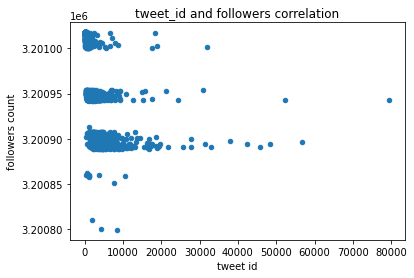

In [895]:
plt.figure(figsize=(10,6))
archive_df.plot(x='retweet_count', y='followers_count', kind='scatter')
plt.xlabel('tweet id')
plt.ylabel('followers count')
plt.title('tweet_id and followers correlation')

fig = plt.gcf()
fig.savefig('retweet_follower.png',bbox_inches='tight');


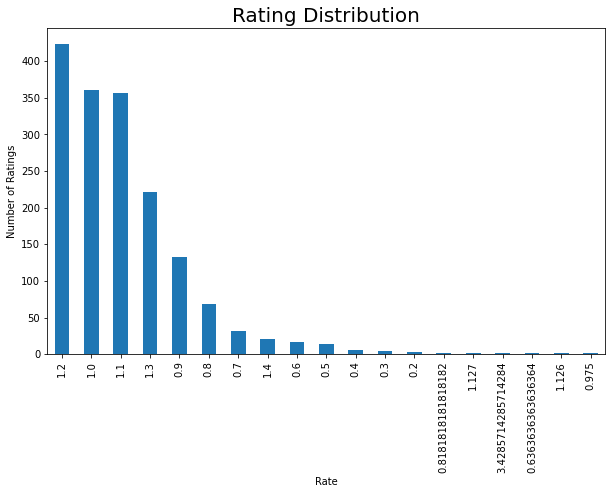

In [896]:
plt.figure(figsize=(10,6))
archive_df['rate'].value_counts().plot(kind='bar')
plt.title ('Rating Distribution', size=20)
plt.xlabel('Rate')
plt.ylabel('Number of Ratings')

fig = plt.gcf()
fig.savefig('rating_distribution.png',bbox_inches='tight');


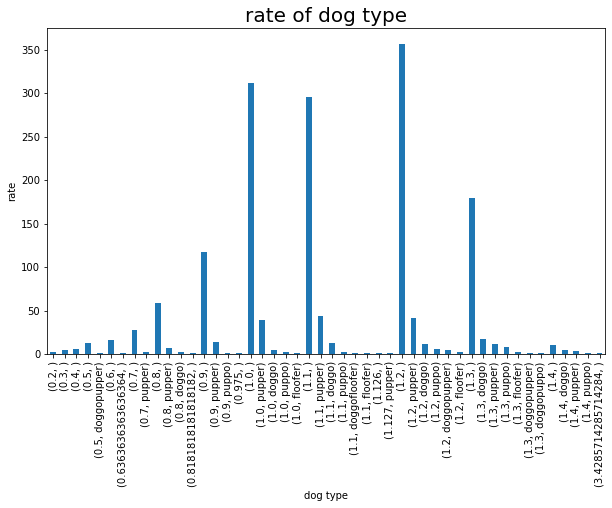

In [897]:
plt.figure(figsize=(10,6))
archive_df['dogs_type'].groupby(archive_df['rate']).value_counts().plot(kind='bar')
plt.title('rate of dog type', size=20)
plt.xlabel('dog type')
plt.ylabel('rate')

fig = plt.gcf()
fig.savefig('dog_type_rate.png',bbox_inches='tight');


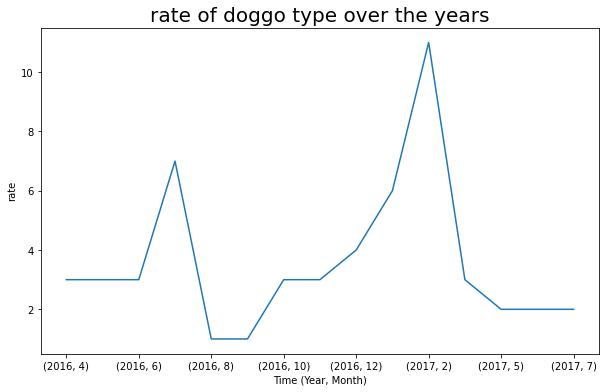

In [898]:
dog_type = archive_df.query('dogs_type == "doggo"')
plt.figure(figsize=(10,6))
dog_type['rate'].groupby([dog_type['year'],dog_type['month']]).count().plot(kind='line')
plt.title('rate of doggo type over the years', size=20)
plt.xlabel('Time (Year, Month)')
plt.ylabel('rate')

fig = plt.gcf()
fig.savefig('doggo_type_rate.png',bbox_inches='tight');


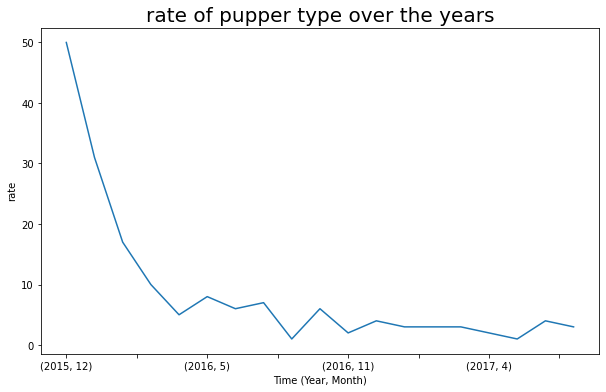

In [899]:
dog_type = archive_df.query('dogs_type == "pupper"')
plt.figure(figsize=(10,6))
dog_type['rate'].groupby([dog_type['year'],dog_type['month']]).count().plot(kind='line')
plt.title('rate of pupper type over the years', size=20)
plt.xlabel('Time (Year, Month)')
plt.ylabel('rate')

fig = plt.gcf()
fig.savefig('pupper_type_rate.png',bbox_inches='tight');


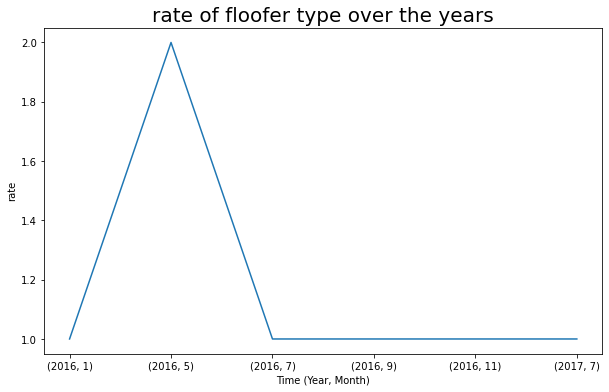

In [900]:
dog_type = archive_df.query('dogs_type == "floofer"')
plt.figure(figsize=(10,6))
dog_type['rate'].groupby([dog_type['year'],dog_type['month']]).count().plot(kind='line')
plt.title('rate of floofer type over the years', size=20)
plt.xlabel('Time (Year, Month)')
plt.ylabel('rate')

fig = plt.gcf()
fig.savefig('floofer_type_rate.png',bbox_inches='tight');


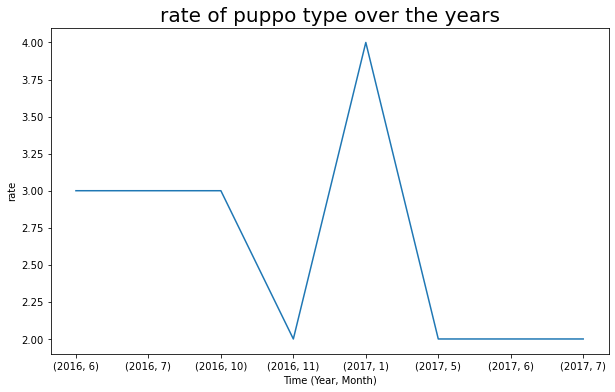

In [901]:
dog_type = archive_df.query('dogs_type == "puppo"')
plt.figure(figsize=(10,6))
dog_type['rate'].groupby([dog_type['year'],dog_type['month']]).count().plot(kind='line')
plt.title('rate of puppo type over the years', size=20)
plt.xlabel('Time (Year, Month)')
plt.ylabel('rate')

fig = plt.gcf()
fig.savefig('puppo_type_rate.png',bbox_inches='tight');
